# Data Exploration, Preparation and Projection  #########

In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('basics').getOrCreate()
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Income Dataset for Further Analysis
df = spark.read.csv('Datasets/Income.csv',header=True,inferSchema=True)

In [3]:
# The show method allows you visualise DataFrames in a tabular format. 
pd.DataFrame(df.take(10), columns=df.columns)

,RecordID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#Show some key details about the attributes
print(df.head(1))

[Row(RecordID=1, age=39, workclass='State-gov', fnlwgt=77516, education='Bachelors', education-num=13, marital-status='Never-married', occupation='Adm-clerical', relationship='Not-in-family', race='White', sex='Male', capital-gain=2174, capital-loss=0, hours-per-week=40, country='United-States', salary='<=50K')]


In [5]:
df.describe('age', 'education-num','hours-per-week').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,32561,38.58164675532078,13.640432553581356,17,90
education-num,32561,10.0806793403151,2.572720332067397,1,16
hours-per-week,32561,40.437455852092995,12.347428681731838,1,99


In [6]:
#Print Scheme
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary: string (nullable = true)



In [7]:
df.groupBy('salary').count().show()
df.groupBy('race').count().show()
df.groupBy('sex').count().show()

+------+-----+
|salary|count|
+------+-----+
| <=50K|24720|
|  >50K| 7841|
+------+-----+

+------------------+-----+
|              race|count|
+------------------+-----+
|             Other|  271|
|Amer-Indian-Eskimo|  311|
|             White|27816|
|Asian-Pac-Islander| 1039|
|             Black| 3124|
+------------------+-----+

+------+-----+
|   sex|count|
+------+-----+
|Female|10771|
|  Male|21790|
+------+-----+



In [8]:
#Drop the unwanted column
dropped_df = df.drop('fnlwgt')
dropped_df = dropped_df.na.drop()
dropped_df = dropped_df.drop('capital-loss')
dropped_df = dropped_df.drop('capital-gain')

In [9]:
df.describe().show()

+-------+-----------------+------------------+-----------+------------------+------------+-----------------+--------------+----------------+------------+------------------+------+------------------+----------------+------------------+----------+------+
|summary|         RecordID|               age|  workclass|            fnlwgt|   education|    education-num|marital-status|      occupation|relationship|              race|   sex|      capital-gain|    capital-loss|    hours-per-week|   country|salary|
+-------+-----------------+------------------+-----------+------------------+------------+-----------------+--------------+----------------+------------+------------------+------+------------------+----------------+------------------+----------+------+
|  count|            32561|             32561|      30725|             32561|       32561|            32561|         32561|           30718|       32561|             32561| 32561|             32561|           32561|             32561|     31

In [10]:
dropped_df.describe().show()

+-------+------------------+------------------+-----------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+----------+------+
|summary|          RecordID|               age|  workclass|   education|     education-num|marital-status|      occupation|relationship|              race|   sex|   hours-per-week|   country|salary|
+-------+------------------+------------------+-----------+------------+------------------+--------------+----------------+------------+------------------+------+-----------------+----------+------+
|  count|             30162|             30162|      30162|       30162|             30162|         30162|           30162|       30162|             30162| 30162|            30162|     30162| 30162|
|   mean|16288.103242490552|38.437901995888865|       null|        null| 10.12131158411246|          null|            null|        null|              null|  null|40.93123798156621|      null|  null|
| std

In [11]:
# Reclassify Label to Yes or No
dropped_df = dropped_df.withColumn('salary', regexp_replace('salary', '>50K', 'yes'))
dropped_df = dropped_df.withColumn('salary', regexp_replace('salary', '<=50K', 'no'))
dropped_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
RecordID,30162,16288.103242490552,9383.401676372081,1,32561
age,30162,38.437901995888865,13.134664776856017,17,90
workclass,30162,None,None,Federal-gov,Without-pay
education,30162,None,None,10th,Some-college
education-num,30162,10.12131158411246,2.5499949188567355,1,16
marital-status,30162,None,None,Divorced,Widowed
occupation,30162,None,None,Adm-clerical,Transport-moving
relationship,30162,None,None,Husband,Wife
race,30162,None,None,Amer-Indian-Eskimo,White


# Method Selection and Application

In [12]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml_application').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).

#We already have our dataframe from above workings dropped_df and can ignore below
# # First, let's import the data. Note that we can infer the schema as it's a CSV file.
# df = spark.read.csv("Income.csv",inferSchema=True,header=True)

In [13]:
dropped_df = dropped_df.drop('RecordID')
dropped_df.describe('age', 'education-num','hours-per-week').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,30162,38.437901995888865,13.134664776856017,17,90
education-num,30162,10.12131158411246,2.5499949188567355,1,16
hours-per-week,30162,40.93123798156621,11.97998422927489,1,99


In [14]:
dropped_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- salary: string (nullable = true)



In [15]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
workclass_indexer = StringIndexer(inputCol='workclass',outputCol='workclassIndex')
education_indexer = StringIndexer(inputCol='education',outputCol='educationIndex')
marital_indexer = StringIndexer(inputCol='marital-status',outputCol='maritalIndex')
occupation_indexer = StringIndexer(inputCol='occupation',outputCol='occupationIndex')
relationship_indexer = StringIndexer(inputCol='relationship',outputCol='relationshipIndex')
race_indexer = StringIndexer(inputCol='race',outputCol='raceIndex')
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
country_indexer = StringIndexer(inputCol='country',outputCol='countryIndex')
salary_indexer = StringIndexer(inputCol='salary',outputCol='label')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclassIndex',outputCol='workclassVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
marital_encoder = OneHotEncoder(inputCol='maritalIndex',outputCol='maritalVec')
occupation_encoder = OneHotEncoder(inputCol='occupationIndex',outputCol='occupationVec')
relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
sex_encoder = OneHotEncoder(inputCol='sexIndex',outputCol='sexVec')
country_encoder = OneHotEncoder(inputCol='countryIndex',outputCol='countryVec')
label_encoder = OneHotEncoder(inputCol='label',outputCol='label')

# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','educationVec','maritalVec','occupationVec',
                                       'relationshipVec','raceVec','sexVec','countryVec',
                                       'age', 'hours-per-week', 'education-num'], outputCol="features")

In [16]:
## PIPELINE ##
from pyspark.ml import Pipeline

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,education_indexer,marital_indexer,occupation_indexer,relationship_indexer,
                            race_indexer,sex_indexer,country_indexer,salary_indexer, workclass_encoder, education_encoder,marital_encoder, 
                            occupation_encoder, relationship_encoder, race_encoder, sex_encoder, country_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(dropped_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(dropped_df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [17]:
pipe_df.describe()

DataFrame[summary: string, label: string]

# Training and Testing Dataset Split

In [18]:
## Split Data ##
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 21003
Test Dataset Count: 9159


# Random Forest

In [19]:
#Iteration 1
from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=50)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)


evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.817447319576373
Test set Precision = 0.8066971497815234
Test set Recall = 0.7951439346116413


In [20]:
#Iteration 2

from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=150)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)

#Evaluation
evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8184299596025767
Test set Precision = 0.807972411905535
Test set Recall = 0.7963952408683201


In [21]:
#Iteration 3

from pyspark.ml.classification import *
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=300)
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)


evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
#print("Test set Recall = " + str(recall))

Test set Accuracy = 0.8189758707282454
Test set Precision = 0.8083146634489402
Test set Recall = 0.7976820407902082


In [22]:
#predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)
#evaluator = BinaryClassificationEvaluator()
#print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

# Naive Bayesian

In [23]:
#Iteration 1
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=0.0, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.7993230702041708
Test set Precision = 0.8205077171165737
Test set Recall = 0.8065698216400182


In [24]:
print(model.explainParams)

<bound method Params.explainParams of NaiveBayes_4df4b3e25696acf05f48>


In [25]:
#Iteration 2
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.7993230702041708
Test set Precision = 0.8204238571121805
Test set Recall = 0.8065502008164264


In [26]:
#Iteration 3
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# create the trainer and set its parameters
nb = NaiveBayes(modelType="multinomial", smoothing = 2.0)

# train the model
model = nb.fit(train_data)

# select example rows to display.
predictions = model.transform(test_data)
#predictions.show()

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))

Test set Accuracy = 0.7991047057539032
Test set Precision = 0.8203020541968615
Test set Recall = 0.8063593426646538


# Logistic Regression

Training Dataset Count: 21063
Test Dataset Count: 9099
Test set Accuracy = 0.7578854819210902
Test set Precision = 0.777189214169577
Test set Recall = 0.6611480983717839


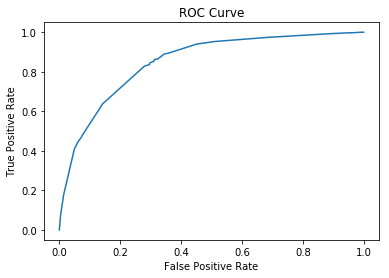

Area Under the Curve: 0.8498079535298946


In [27]:
##Iteration1##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label',maxIter=100, regParam=0.1, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))


Training Dataset Count: 21200
Test Dataset Count: 8962
Test set Accuracy = 0.8281633563936621
Test set Precision = 0.8182149231896381
Test set Recall = 0.8146231879949924


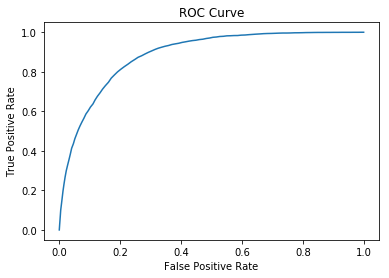

Area Under the Curve: 0.8854076970909341


In [28]:
##Iteration2##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label',maxIter=200, regParam=0.1, elasticNetParam=0)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

Training Dataset Count: 21051
Test Dataset Count: 9111
Test set Accuracy = 0.8351443310284272
Test set Precision = 0.8274505237799205
Test set Recall = 0.8283631099937494


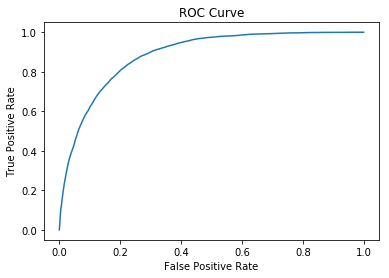

Area Under the Curve: 0.8847703222914268


In [29]:
##Iteration3##
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label', maxIter=100, regParam=0, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="weightedPrecision")
evaluator3 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="f1")
accuracy = evaluator1.evaluate(predictions)
precision = evaluator2.evaluate(predictions)
recall = evaluator3.evaluate(predictions)

print("Test set Accuracy = " + str(accuracy))
print("Test set Precision = " + str(precision))
print("Test set Recall = " + str(recall))
### ROC CURVE ###

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

# Interpretation

In [30]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName('basics').getOrCreate()
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
df = pd.read_csv('Datasets/Income.csv')

In [32]:
df.isna().sum()

RecordID             0
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df['salary']=df['salary'].map({'<=50K': 0, '>50K': 1, '<=50K.': 'No', '>50K.': 'Yes'})

In [35]:
df.head(4)

,RecordID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [36]:
female = df[df.sex == 'Female']
male = df[df.sex == 'Male']

In [37]:
# Identify Numeric features
numeric_features = ['age','education-num','hours-per-week','salary']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native']

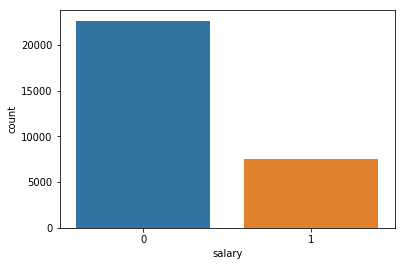

In [38]:
sns.countplot(df['salary'],label="Count")

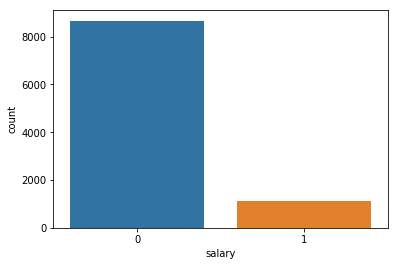

In [39]:
sns.countplot(female['salary'],label="Count")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


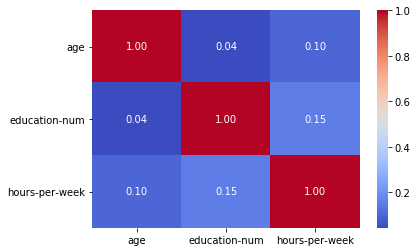

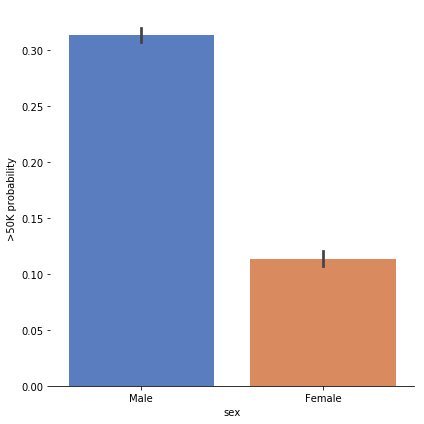

In [40]:
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
g = sns.factorplot(x="sex",y="salary",data=df,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

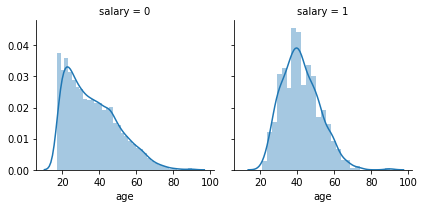

In [41]:
# Explore Age vs Income
g = sns.FacetGrid(female, col='salary')
g = g.map(sns.distplot, "age")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


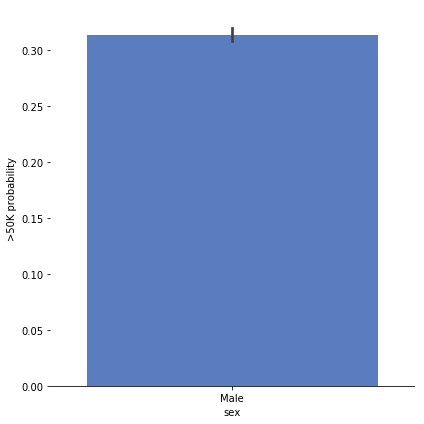

In [42]:
g = sns.factorplot(x="sex",y="salary",data=male,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


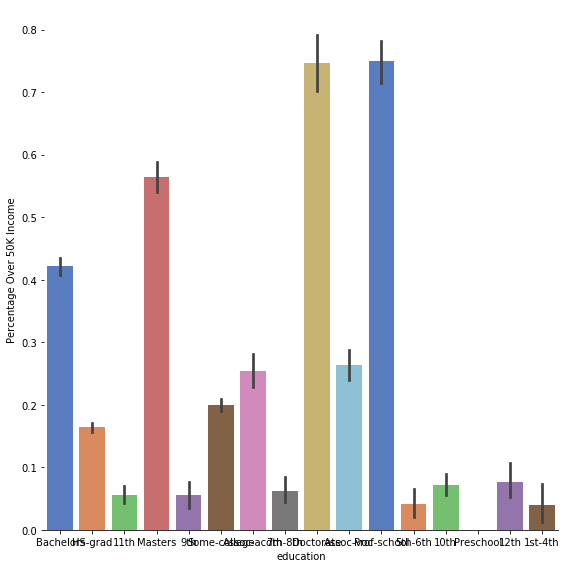

In [43]:
g = sns.factorplot(x="education",y="salary",data=df,kind="bar",size = 8,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


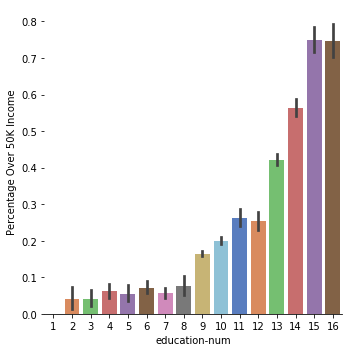

In [44]:
g = sns.factorplot(x="education-num",y="salary",data=df,kind="bar",size = 5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


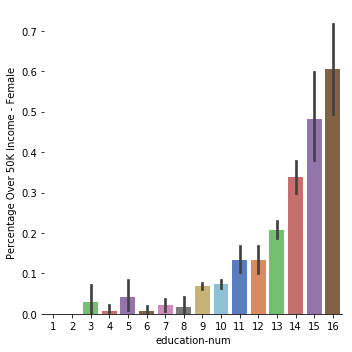

In [45]:
g = sns.factorplot(x="education-num",y="salary",data=female,kind="bar",size = 5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income - Female")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


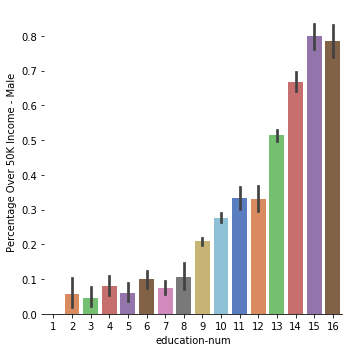

In [46]:
g = sns.factorplot(x="education-num",y="salary",data=male,kind="bar",size = 5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income - Male")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


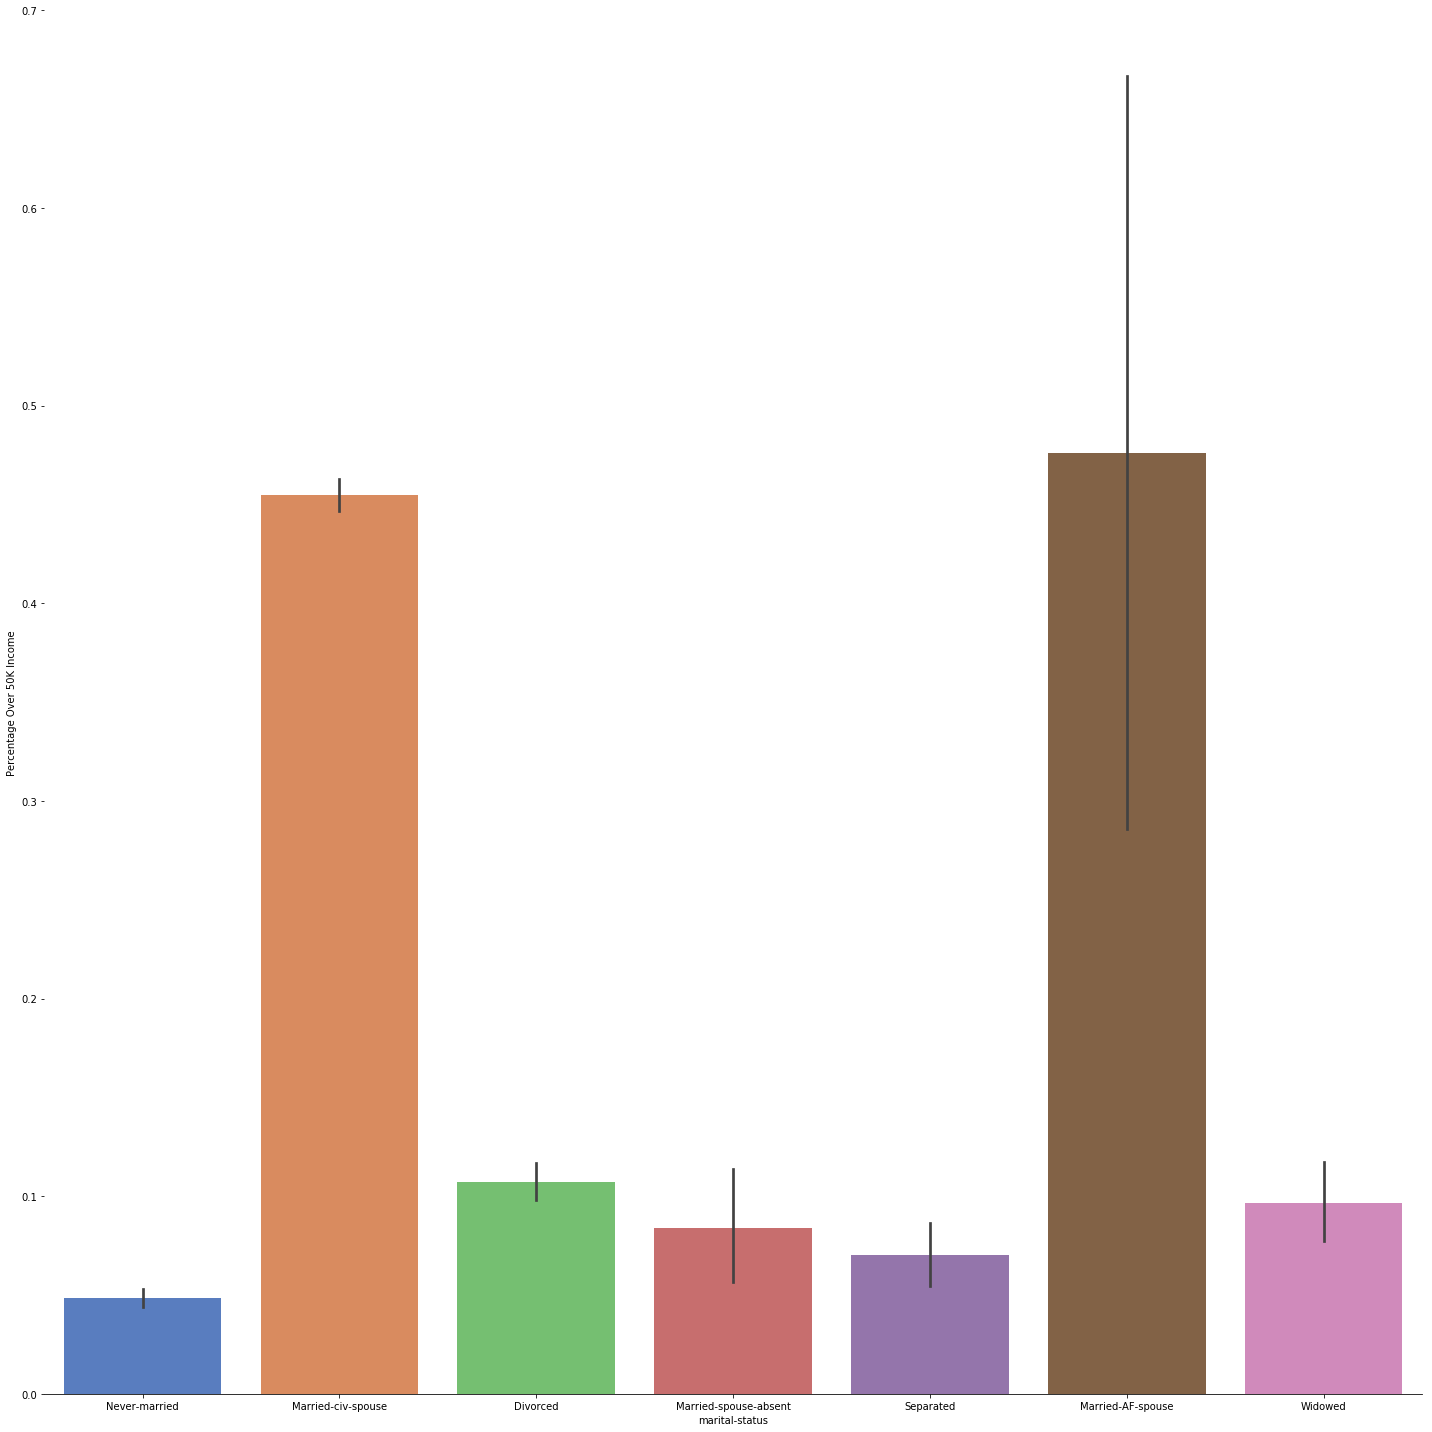

In [47]:
g = sns.factorplot(x="marital-status",y="salary",data=df,kind="bar",size = 20,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


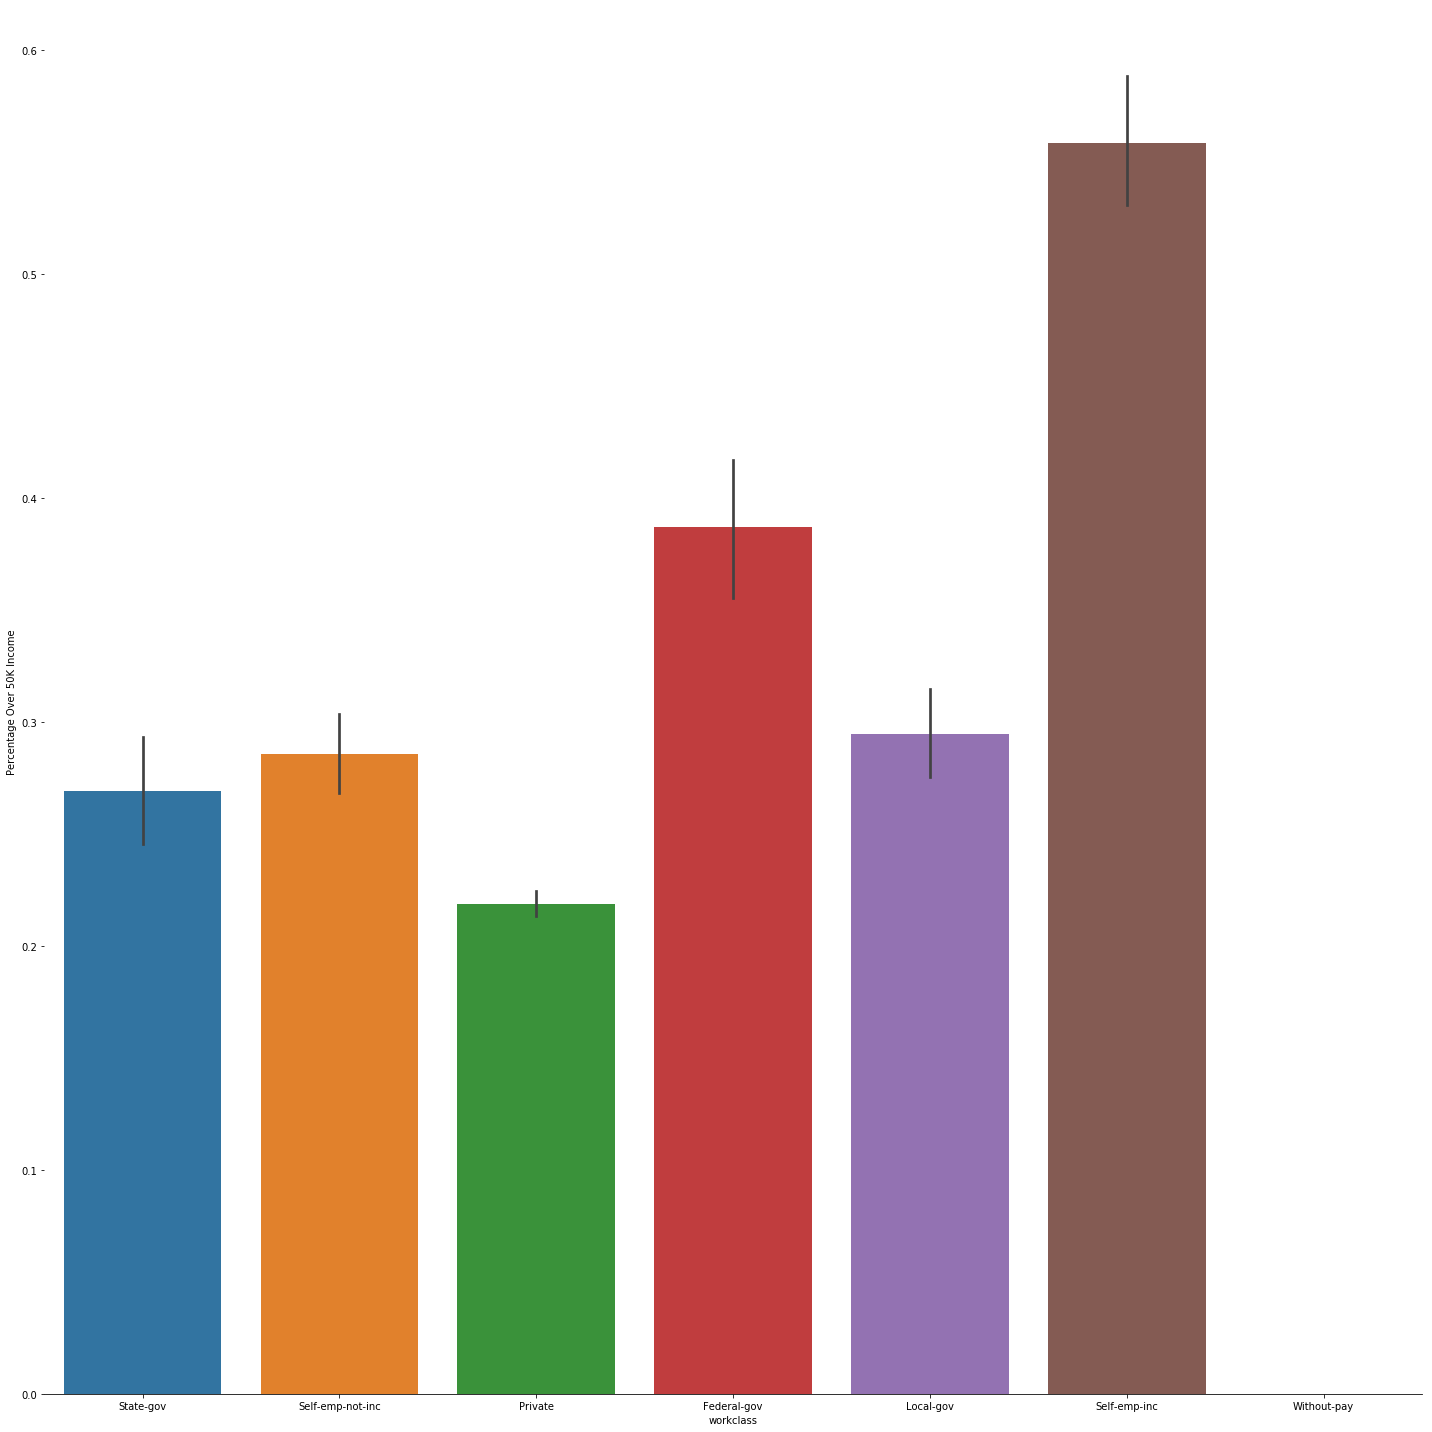

In [48]:
g = sns.factorplot(x="workclass",y="salary",data=df,kind="bar",size = 20)
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


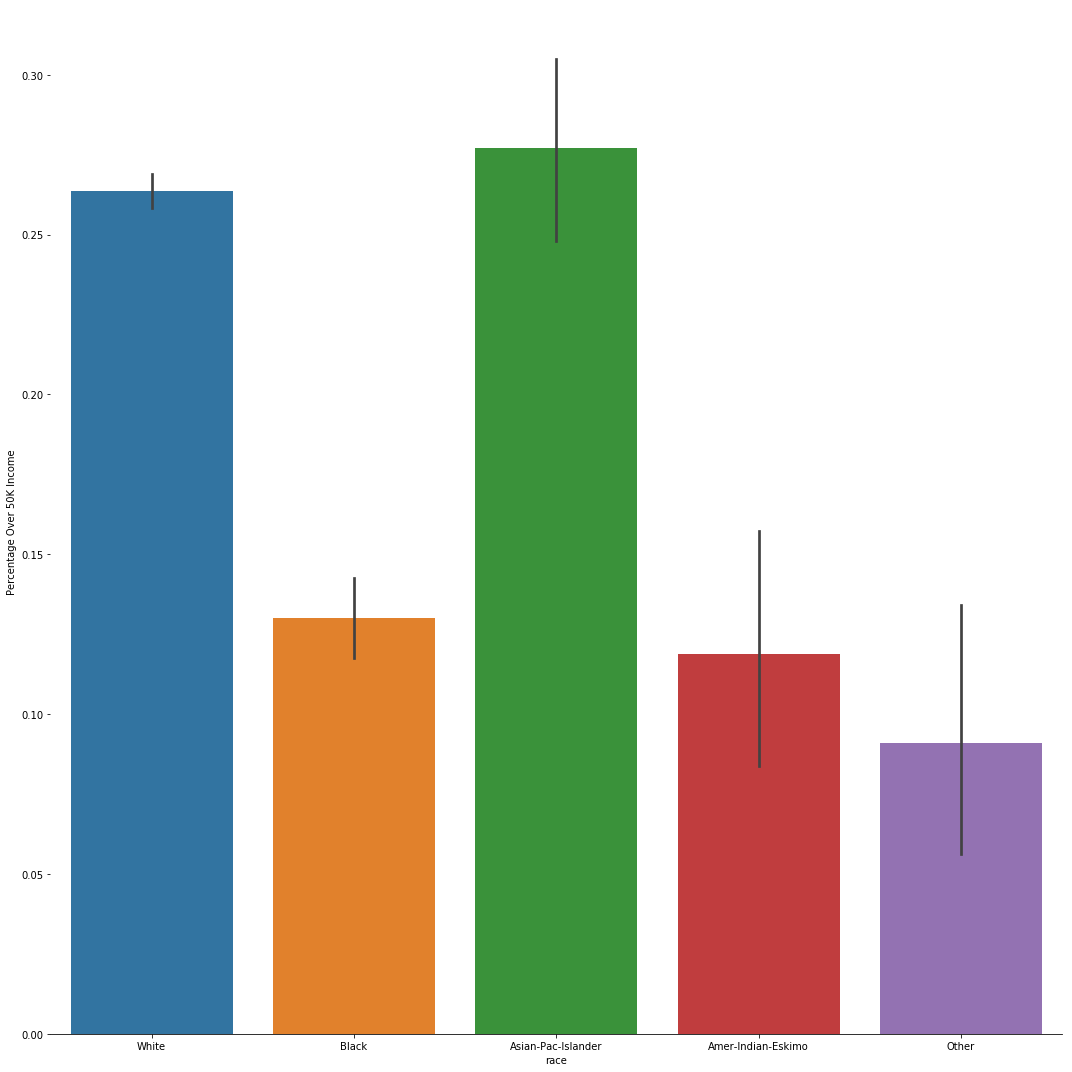

In [49]:
g = sns.factorplot(x="race",y="salary", data=df,kind="bar",size = 15)
g.despine(left=True)
g = g.set_ylabels("Percentage Over 50K Income")

/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/ubuntu/.local/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


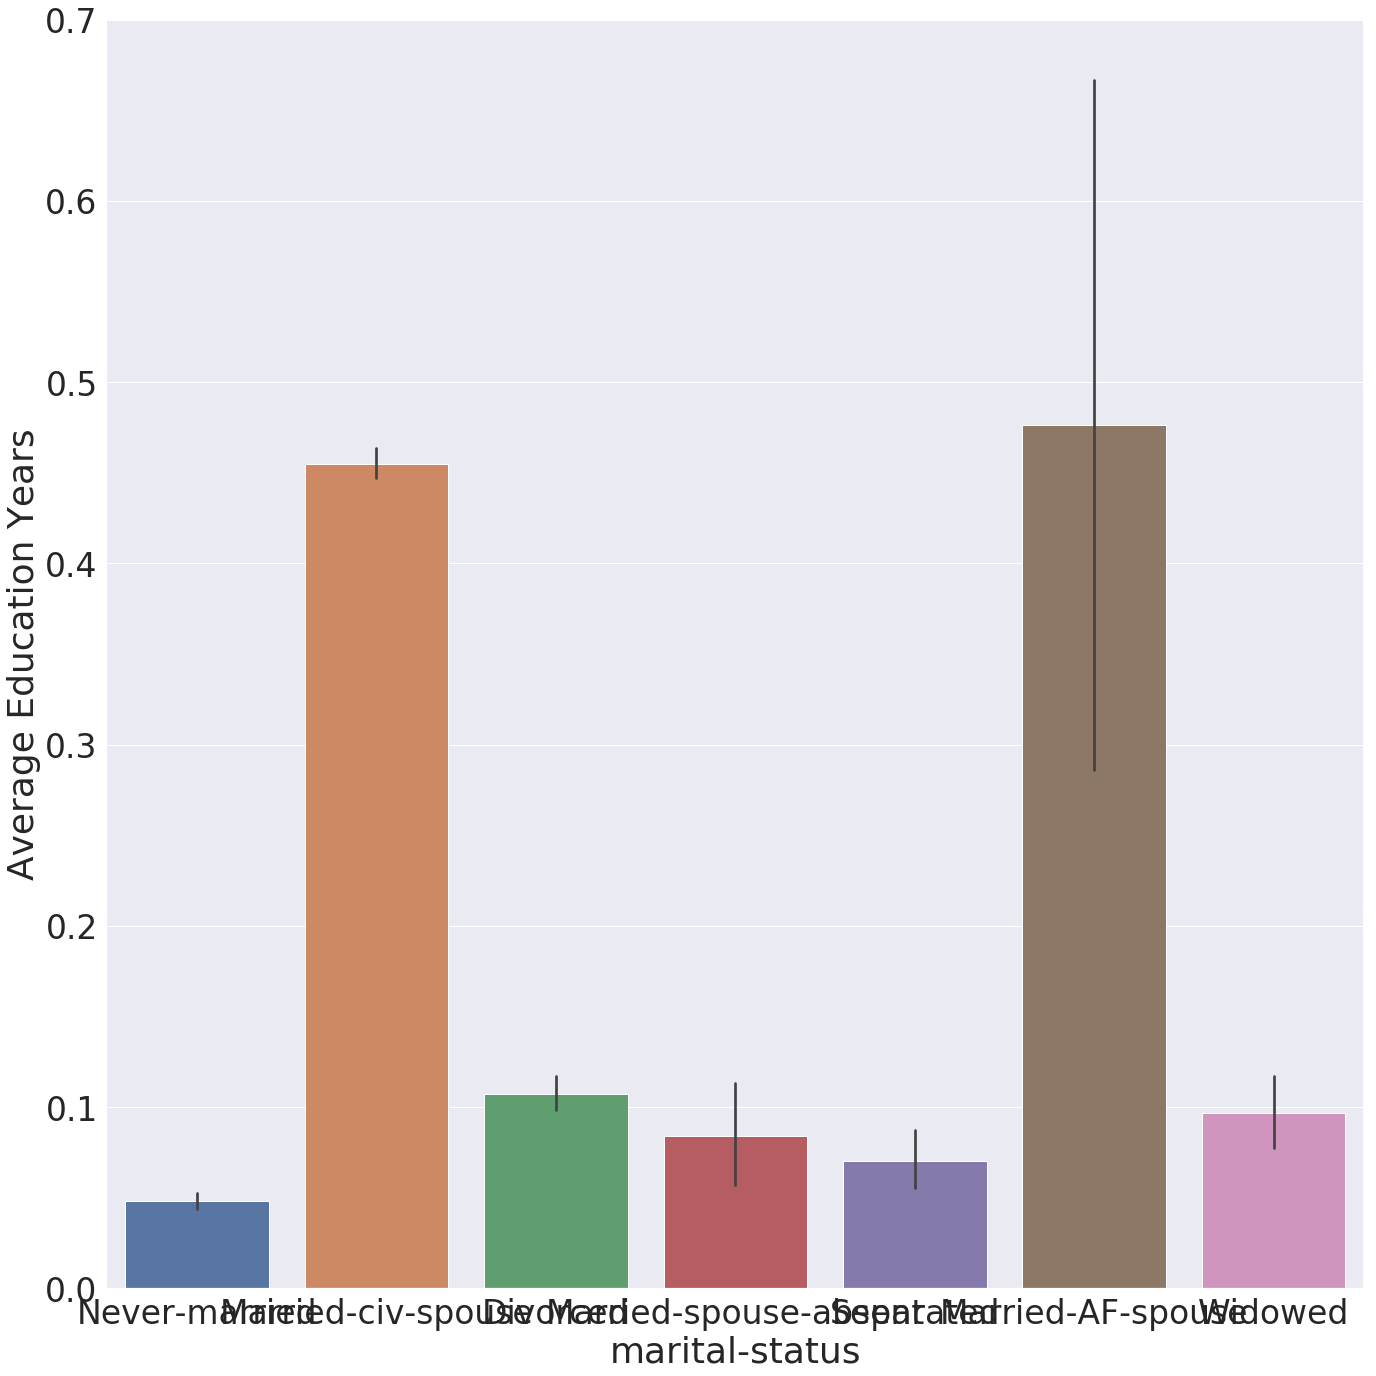

In [50]:
sns.set(font_scale=3)
g = sns.factorplot(x="marital-status",y="salary", data=df,kind="bar",size = 20)
g.despine(left=True)
g = g.set_ylabels("Average Education Years")

# Feature Importance

In [68]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
workclass_indexer = StringIndexer(inputCol='workclass',outputCol='workclassIndex')
education_indexer = StringIndexer(inputCol='education',outputCol='educationIndex')
marital_indexer = StringIndexer(inputCol='marital-status',outputCol='maritalIndex')
occupation_indexer = StringIndexer(inputCol='occupation',outputCol='occupationIndex')
#relationship_indexer = StringIndexer(inputCol='relationship',outputCol='relationshipIndex')
race_indexer = StringIndexer(inputCol='race',outputCol='raceIndex')
sex_indexer = StringIndexer(inputCol='sex',outputCol='sexIndex')
country_indexer = StringIndexer(inputCol='country',outputCol='countryIndex')
salary_indexer = StringIndexer(inputCol='salary',outputCol='label')

# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclassIndex',outputCol='workclassVec')
education_encoder = OneHotEncoder(inputCol='educationIndex',outputCol='educationVec')
marital_encoder = OneHotEncoder(inputCol='maritalIndex',outputCol='maritalVec')
occupation_encoder = OneHotEncoder(inputCol='occupationIndex',outputCol='occupationVec')
#relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')
race_encoder = OneHotEncoder(inputCol='raceIndex',outputCol='raceVec')
sex_encoder = OneHotEncoder(inputCol='sexIndex',outputCol='sexVec')
country_encoder = OneHotEncoder(inputCol='countryIndex',outputCol='countryVec')
label_encoder = OneHotEncoder(inputCol='label',outputCol='label')

#,'relationshipVec'
# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','educationVec','maritalVec','occupationVec',
                                       'raceVec','sexVec','countryVec',
                                       'age', 'hours-per-week', 'education-num'], outputCol="features")

In [69]:
## PIPELINE ##
from pyspark.ml import Pipeline

#relationship_encoder,
# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,education_indexer,marital_indexer,relationship_indexer,
                            race_indexer,sex_indexer,occupation_indexer, country_indexer,salary_indexer, workclass_encoder, education_encoder,marital_encoder, 
                            race_encoder, sex_encoder, occupation_encoder, country_encoder, assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(dropped_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(dropped_df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

In [70]:
## Split Data ##
# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 21113
Test Dataset Count: 9049


In [71]:
##Iteration3##
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label', maxIter=100, regParam=0, elasticNetParam=0.8)

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
predictions = lr_model.transform(test_data)

evaluator1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator1.evaluate(predictions)
print("Test set Accuracy = " + str(accuracy))

Test set Accuracy = 0.8365565255829374


In [ ]:
Test set Accuracy = 0.8284703801945181 Sex